<a href="https://colab.research.google.com/github/DOMINION-JOHN1/voting_eligibility_model/blob/main/voting_age_eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd
import cv2
import os
from glob import glob
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization, BatchNormalization,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import pickle

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive',force_remount=True)

# Get the path to the folder on your local machine
folder_path = 'C:/Users/Admin/Downloads/AdienceBenchmarkGenderAndAgeClassification'

Mounted at /content/drive


In [ ]:
google_colab_folder_path = '/content/drive'

# List the files in the folder
files = os.listdir(google_colab_folder_path)

# Print the files in the folder
for file in files:
  print(file)


MyDrive
.shortcut-targets-by-id
.file-revisions-by-id
.Trash-0


In [ ]:
#load data
data1 = pd.read_csv("/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t")
data2 = pd.read_csv("/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
data3 = pd.read_csv("/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
data4 = pd.read_csv("/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t")
data5 = pd.read_csv("/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

In [ ]:
total_data = pd.concat([ data4, data2, data3, data1,  data5], ignore_index=True)
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)
print(total_data.shape)

(3446, 12)
(3730, 12)
(3894, 12)
(4484, 12)
(3816, 12)
(19370, 12)


In [ ]:
#present data
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [ ]:
#data describtion
total_data.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000
mean,1023.858906,949.670212,675.659370,633.042437,629.692463,-12.405111,3.128549,72.266598
std,645.385251,667.060150,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247
min,1.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000
25%,486.000000,441.250000,333.000000,324.000000,325.000000,-80.000000,0.000000,42.000000
50%,980.000000,852.000000,653.000000,517.000000,517.000000,-5.000000,0.000000,70.000000
75%,1526.000000,1359.000000,964.000000,778.000000,778.000000,5.000000,0.000000,98.000000
max,2284.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000


In [ ]:
#data types
total_data.dtypes
#total_data.info()

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

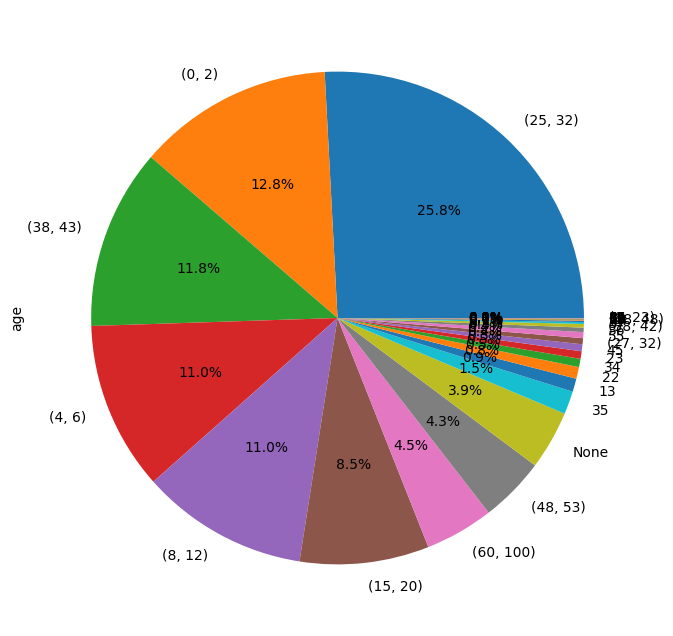

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
32              3
2               3
56              2
42              1
46              1
(8, 23)         1
Name: age, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
#pie_graph to present gender
plt.figure(1, figsize=(8,8))
total_data.age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
total_data.age.value_counts()

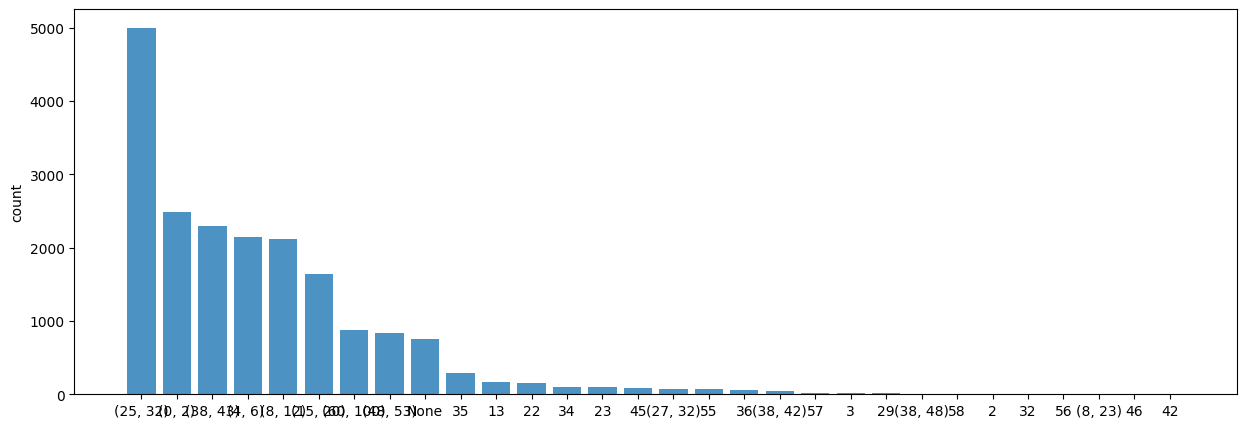

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
32              3
2               3
56              2
42              1
46              1
(8, 23)         1
Name: age, dtype: int64

In [ ]:
#bar chart to present age

age = ['(25, 32)' , '(0, 2)', '(38, 43)' ,'(4, 6) ','(8, 12)','(15, 20)','(60, 100)','(48, 53)' ,'None','35','13','22','34','23' ,'45','(27, 32)','55','36','(38, 42)','57','3','29','(38, 48)','58','2','32','56','(8, 23)','46','42']

plt.figure(figsize=(15, 5))  # width:20, height:3
plt.bar(age, total_data.age.value_counts(), align='center', alpha=0.8)
plt.ylabel('count')
plt.show()
#to Create horizontal bar plot here "plt.barh(labels, values)"

total_data.age.value_counts()

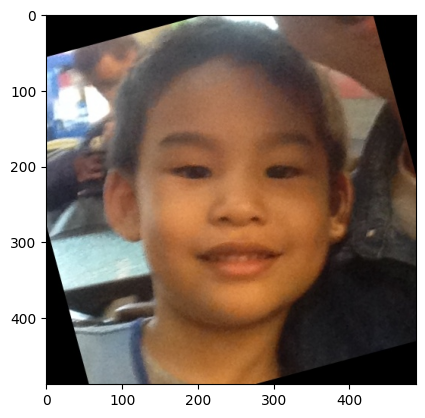

In [ ]:
path = "/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/faces/7153718@N04/coarse_tilt_aligned_face.2282.11597935265_29bcdfa4a5_o.jpg"
img = load_img(path)
plt.imshow(img)
plt.show()

In [ ]:
df = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()

In [ ]:
img_path = []
for row in total_data.iterrows():
    path = "/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)
df['img_path'] = img_path

In [ ]:
#present data before
df.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,/content/drive/My Drive/AdienceBenchmarkGender...
1,"(25, 32)",m,301,105,640,641,/content/drive/My Drive/AdienceBenchmarkGender...
2,"(25, 32)",f,2395,876,771,771,/content/drive/My Drive/AdienceBenchmarkGender...
3,"(25, 32)",m,752,1255,484,485,/content/drive/My Drive/AdienceBenchmarkGender...
4,"(25, 32)",m,175,80,769,768,/content/drive/My Drive/AdienceBenchmarkGender...


<ipython-input-16-2801eb4539ce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

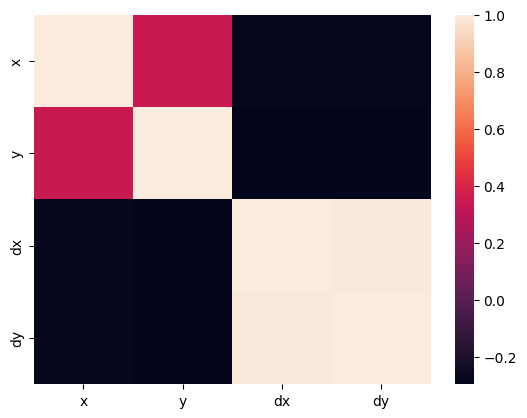

In [ ]:
#heatmap
import seaborn as sns
sns.heatmap(df.corr())

Removal of null values

In [ ]:
df.dropna(inplace=True)
df.drop('gender', axis=1,inplace=True)


In [ ]:
unbiased_data = df[df.age != 'None']
unbiased_data.age.value_counts()

(25, 32)     4953
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2119
(15, 20)     1642
(60, 100)     867
(48, 53)      825
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
(8, 23)         1
42              1
46              1
Name: age, dtype: int64

In [ ]:
unbiased_data.to_csv('voting_age.csv')

In [ ]:
pd.read_csv('voting_age.csv')

,Unnamed: 0,age,x,y,dx,dy,img_path
0,0,"(25, 32)",0,414,1086,1383,/content/drive/My Drive/AdienceBenchmarkGender...
1,1,"(25, 32)",301,105,640,641,/content/drive/My Drive/AdienceBenchmarkGender...
2,2,"(25, 32)",2395,876,771,771,/content/drive/My Drive/AdienceBenchmarkGender...
3,3,"(25, 32)",752,1255,484,485,/content/drive/My Drive/AdienceBenchmarkGender...
4,4,"(25, 32)",175,80,769,768,/content/drive/My Drive/AdienceBenchmarkGender...
...,...,...,...,...,...,...,...
18546,19341,"(25, 32)",718,748,492,492,/content/drive/My Drive/AdienceBenchmarkGender...
18547,19342,"(25, 32)",48,472,768,768,/content/drive/My Drive/AdienceBenchmarkGender...
18548,19343,"(25, 32)",950,0,692,687,/content/drive/My Drive/AdienceBenchmarkGender...
18549,19344,"(25, 32)",831,895,899,899,/content/drive/My Drive/AdienceBenchmarkGender...


In [ ]:
unbiased_data['age'].value_counts()

(25, 32)     4953
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2119
(15, 20)     1642
(60, 100)     867
(48, 53)      825
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
(8, 23)         1
42              1
46              1
Name: age, dtype: int64

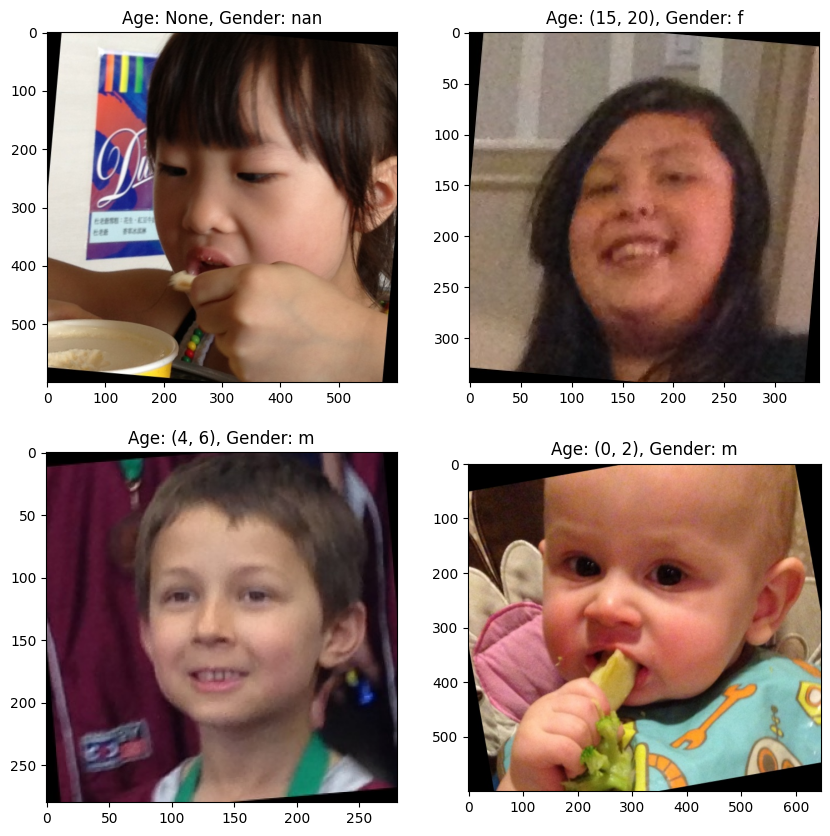

In [ ]:
import random
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join("/content/drive/My Drive/AdienceBenchmarkGenderAndAgeClassification/faces/",str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 2
    n_rows = 2
    images.append((image, age, gender))

fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(10,10))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

In [ ]:
unbiased_data

,age,x,y,dx,dy,img_path
0,"(25, 32)",0,414,1086,1383,/content/drive/My Drive/AdienceBenchmarkGender...
1,"(25, 32)",301,105,640,641,/content/drive/My Drive/AdienceBenchmarkGender...
2,"(25, 32)",2395,876,771,771,/content/drive/My Drive/AdienceBenchmarkGender...
3,"(25, 32)",752,1255,484,485,/content/drive/My Drive/AdienceBenchmarkGender...
4,"(25, 32)",175,80,769,768,/content/drive/My Drive/AdienceBenchmarkGender...
...,...,...,...,...,...,...
19341,"(25, 32)",718,748,492,492,/content/drive/My Drive/AdienceBenchmarkGender...
19342,"(25, 32)",48,472,768,768,/content/drive/My Drive/AdienceBenchmarkGender...
19343,"(25, 32)",950,0,692,687,/content/drive/My Drive/AdienceBenchmarkGender...
19344,"(25, 32)",831,895,899,899,/content/drive/My Drive/AdienceBenchmarkGender...


In [ ]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'),
 ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'),
  ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'),
               ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []#contains the indexes that has None (None labels)
for idx, each in enumerate(unbiased_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        unbiased_data.age.loc[idx] = age_mapping_dict[each]
unbiased_data = unbiased_data.drop(labels=drop_labels, axis=0) #droped None values (axis = 0 , removing rows)
unbiased_data.age.value_counts(dropna=False)

<ipython-input-26-3f39e190b0e9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unbiased_data.age.loc[idx] = age_mapping_dict[each]
<ipython-input-26-3f39e190b0e9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unbiased_data.age.loc[idx] = age_mapping_dict[each]
<ipython-input-26-3f39e190b0e9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unbiased_data.age.loc[idx] = age_mapping_dict[each]
<ipython-input-26-3f39e190b0e9>:12: S

25-32        4888
38-43        2666
0-2          2472
8-13         2137
4-6          2119
15-20        1784
48-53         891
60+           859
(25, 32)      320
(0, 2)        179
(38, 43)       77
(8, 12)        50
(60, 100)      35
(15, 20)       34
(48, 53)       19
(4, 6)         13
35              6
55              2
Name: age, dtype: int64

In [ ]:
unbiased_data['age'].value_counts()

25-32        4888
38-43        2666
0-2          2472
8-13         2137
4-6          2119
15-20        1784
48-53         891
60+           859
(25, 32)      320
(0, 2)        179
(38, 43)       77
(8, 12)        50
(60, 100)      35
(15, 20)       34
(48, 53)       19
(4, 6)         13
35              6
55              2
Name: age, dtype: int64

In [ ]:
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
unbiased_data.age = unbiased_data.age.replace(age_map)


In [ ]:
unbiased_data['age'].value_counts()

4            4888
5            2666
0            2472
2            2137
1            2119
3            1784
6             891
7             859
(25, 32)      320
(0, 2)        179
(38, 43)       77
(8, 12)        50
(60, 100)      35
(15, 20)       34
(48, 53)       19
(4, 6)         13
35              6
55              2
Name: age, dtype: int64

In [ ]:
unbiased_data=unbiased_data[unbiased_data.age!='(25, 32)']


In [ ]:
unbiased_data=unbiased_data[unbiased_data['age']!='(0, 2)']
unbiased_data=unbiased_data[unbiased_data['age']!='(38, 43)']
unbiased_data=unbiased_data[unbiased_data['age']!='(8, 12)']
unbiased_data=unbiased_data[unbiased_data['age']!='(60, 100)']
unbiased_data=unbiased_data[unbiased_data['age']!='(15, 20)']
unbiased_data=unbiased_data[unbiased_data['age']!='(48, 53)']
unbiased_data=unbiased_data[unbiased_data['age']!='(4, 6)']

In [ ]:
unbiased_data.age.value_counts()

4     4888
5     2666
0     2472
2     2137
1     2119
3     1784
6      891
7      859
35       6
55       2
Name: age, dtype: int64

In [ ]:
grade_map = {
    0  :'Not Eligible',
    1  :'Not Eligible',
    2 :'Eligible',
    4:'Eligible',
    3:'Eligible',
    5:'Eligible',
    6:'Eligible',
    7:'Eligible',
    35:'Eligible',
    55:'Eligible'
}
unbiased_data.age = unbiased_data.age.replace(grade_map)


In [ ]:
unbiased_data.age.value_counts()

Eligible        13225
Not Eligible     4591
35                  6
55                  2
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

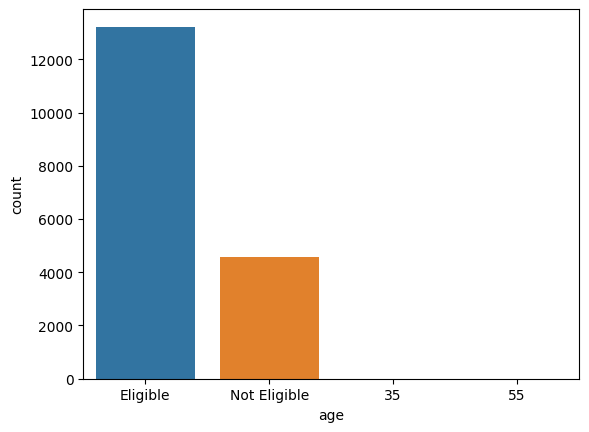

In [ ]:
sns.countplot(data=unbiased_data,x='age')

In [ ]:
import cv2
import os
import numpy as np

# Assuming you have a list of image paths and their corresponding labels
image_paths = unbiased_data.img_path
labels = unbiased_data.age

skipped_paths = []
images = []
new_labels = []

for img_path, label in zip(image_paths, labels):
    try:
        # Check if the image path exists
        if not os.path.exists(img_path):
            skipped_paths.append(img_path)
            continue  # Skip this iteration and move to the next image path

        # Load and process the image
        image = cv2.imread(img_path)
        if image is None:
            skipped_paths.append(img_path)
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (64, 64))
        images.append(image)
        new_labels.append(label)  # Append the corresponding label for this image

    except Exception as e:
        # If any exception occurs during image loading or processing, skip the image
        skipped_paths.append(img_path)
        print(f"An error occurred for image path: {img_path}\nError message: {str(e)}")

# Now, 'images' contains the processed images and 'new_labels' contains corresponding labels
# 'skipped_paths' contains the image paths that were missing or had errors


In [ ]:
X=np.array(images)
X.shape

(13563, 64, 64, 3)

In [ ]:
y=pd.DataFrame(new_labels)


In [ ]:
if len(X) != len(y):
    print("x_data and y_data have different sizes.")
    exit()


In [ ]:
x = np.squeeze(X)
x = X.astype('float32')
x /= 255
x.shape


(13563, 64, 64, 3)

In [ ]:
y['eligibility']=y[0]

In [ ]:
eligibility=y
eligibility

,0,eligibility
0,Eligible,Eligible
1,Eligible,Eligible
2,Eligible,Eligible
3,Eligible,Eligible
4,Eligible,Eligible
...,...,...
13558,55,55
13559,35,35
13560,35,35
13561,35,35


In [ ]:
eligibility.to_csv()
eligibility

,0,eligibility
0,Eligible,Eligible
1,Eligible,Eligible
2,Eligible,Eligible
3,Eligible,Eligible
4,Eligible,Eligible
...,...,...
13558,55,55
13559,35,35
13560,35,35
13561,35,35


In [ ]:
eligibility['eligibility']=eligibility['eligibility'].replace('55', 'Eligible')
eligibility['eligibility']=eligibility['eligibility'].replace('35', 'Eligible')
eligibility['eligibility'] = eligibility['eligibility'].replace({'Eligible': 1, 'Not Eligible': 0})
y = np.array(eligibility['eligibility'])
y.astype('float32')
y.shape

(13563,)

In [ ]:
file_path = '/content/drive/My Drive/'

# Save the numpy array to a .npy file
np.save(file_path, x)

print(f"Numpy array saved to '{file_path}'")

Numpy array saved to '/content/drive/My Drive/'


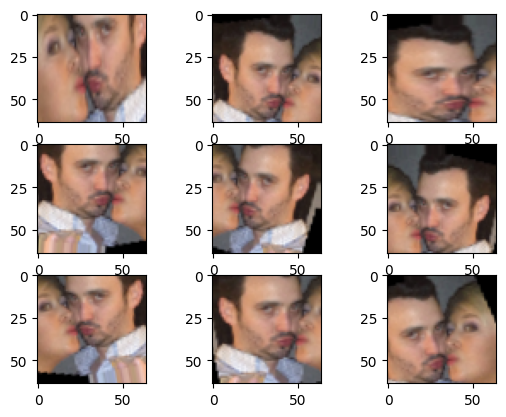

<Figure size 640x480 with 0 Axes>

In [ ]:
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils  import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

def plot_augmentation(image):
    data = img_to_array(image)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    image_gen = ImageDataGenerator(
            width_shift_range=.15,
            height_shift_range=.15,
            rotation_range=15,
            horizontal_flip=True,
            zoom_range=[0.5,1.0])
    # prepare iterator
    it = image_gen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(9):
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        plt.imshow(image)
    # show the figure
    plt.show()
    plt.savefig('augmentation_demo.png', dpi = 300, bbox_inches='tight')


plot_augmentation(images[32])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the sizes of the train and test sets
print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 10850
Testing data size: 2713


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()

# 1.
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3)))  # Added kernel_size argument
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# 2.
model.add(Conv2D(64, kernel_size=(3, 3)))  # Added kernel_size argument
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# 3.
model.add(Conv2D(64, kernel_size=(3, 3)))  # Added kernel_size argument
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

# Define the file path for saving the best model
checkpoint_filepath = '/content/drive/My Drive/best_model.h5'

# Create callbacks
checkpointer = ModelCheckpoint(filepath=checkpoint_filepath, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

epochs = 50
batch_size = 30  # Adjust batch size based on available memory


# Fit the model with callbacks
hist = model.fit(X_train, y_train, batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer, early_stopping, reduce_lr],
    verbose=2
)


Epoch 1/50

Epoch 1: val_loss improved from inf to 0.57119, saving model to /content/drive/My Drive/best_model.h5
362/362 - 93s - loss: 0.5815 - accuracy: 0.7359 - val_loss: 0.5712 - val_accuracy: 0.7346 - lr: 0.0010 - 93s/epoch - 257ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.57119 to 0.56410, saving model to /content/drive/My Drive/best_model.h5
362/362 - 89s - loss: 0.5681 - accuracy: 0.7364 - val_loss: 0.5641 - val_accuracy: 0.7353 - lr: 0.0010 - 89s/epoch - 246ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.56410
362/362 - 89s - loss: 0.5628 - accuracy: 0.7378 - val_loss: 0.5655 - val_accuracy: 0.7376 - lr: 0.0010 - 89s/epoch - 246ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.56410 to 0.56138, saving model to /content/drive/My Drive/best_model.h5
362/362 - 84s - loss: 0.5552 - accuracy: 0.7402 - val_loss: 0.5614 - val_accuracy: 0.7379 - lr: 0.0010 - 84s/epoch - 231ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.56138 to 0.55589, saving model to